# DataSet Name: Marketing Campaign Results

# DataSet Description: 

The dataset contains information on 2,240 Maven Marketing customers, including comprehensive customer profiles, product preferences, campaign results (both successes and failures), and performance metrics for different marketing channels. This data offers an in-depth understanding of consumer behavior, campaign effectiveness, and channel choices. It enables Maven Marketing to make informed decisions and create customized marketing strategies.
    
# DataSet URL: 
https://mavenanalytics.io/data-playground?page=8&pageSize=5

In [2]:
#Import Libraries for data manipulation and visualization 
import pandas as pnd
import matplotlib.pyplot as mtpltlib
import seaborn as sea_born

In [3]:
# using pandas library as pnd to view our data file
dat_fram = pnd.read_csv('marketing_data.csv')
# display the head top 5 entries of the dataset 
dat_fram.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [4]:
# Checking how many columns and rows we have in our dataset 
dat_fram.shape

(2240, 28)

In [5]:
# Checking the Complete Information about the dataset features  
dat_fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# found that Dt_Customer features datatype should be datetime64 not object let's handle it 

dat_fram['Dt_Customer']=pnd.to_datetime(dat_fram['Dt_Customer'])
dat_fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
# let's print all the column names 
dat_fram.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
# Findings 

# We have found that there is a space before and after the "Income" column in our dataset 
# Renaming the column "INCOME" by removing the spaces
dat_fram.rename(columns={' Income ': 'Income'}, inplace = True)

In [9]:
# Finding Null values from our DataSet
dat_fram.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [10]:
# Let's Analysis and CLeaning Income Column 

dat_fram['Income'].isnull().sum()

24

In [11]:
# FIlling null values by using means method 
edu_inc = dat_fram.groupby('Education')['Income'].mean().to_dict()
dat_fram['Income']=dat_fram['Income'].fillna(dat_fram['Education'].map(edu_inc))
dat_fram.reset_index() #reseting index to just make it easy to iterate throw
dat_fram['Income'].isnull().sum()

0

<Axes: xlabel='Marital_Status', ylabel='count'>

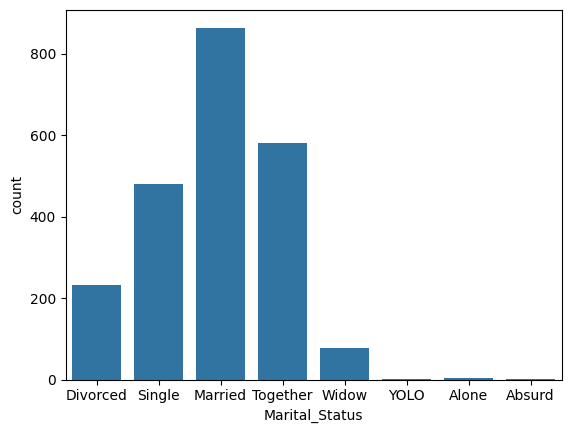

In [12]:
# Let's Analysis and CLeaning Marital_Status Column

sea_born.countplot(data=dat_fram,x=dat_fram['Marital_Status'])

In [16]:
# Findings 
# As we found above "Single and Alone have same meaning and "YOLO" and "Absurd" are not important for our dataset so let's combine and remove the relationship of the columns = dat_fram['Marital_Status']=='Alone'
relationship = dat_fram['Marital_Status']=='Alone'
dat_fram.loc[relationship,'Marital_Status']='Single'

relationship = (dat_fram['Marital_Status']=='Absurd') | (dat_fram['Marital_Status']=='YOLO')
dat_fram_drop=dat_fram.loc[relationship]
dat_fram_drop.index
dat_fram.drop(index=dat_fram_drop.index,inplace = True)
dat_fram['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [17]:
# Let's Analysis and CLeaning Age Column
# To easily understand the Age of the Customer let's convert Year_Birth to Age 

dat_fram['Age']=2024-dat_fram['Year_Birth']
dat_fram.drop(columns = 'Year_Birth',inplace= True)
dat_fram.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,1,0,0,0,0,0,1,0,Spain,54
1,1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,5,0,0,0,0,1,1,0,Canada,63
2,10476,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,0,0,0,0,0,0,0,USA,66
3,1386,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,7,0,0,0,0,0,0,0,Australia,57
4,5371,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,7,1,0,0,0,0,1,0,Spain,35


<Axes: xlabel='Age', ylabel='Count'>

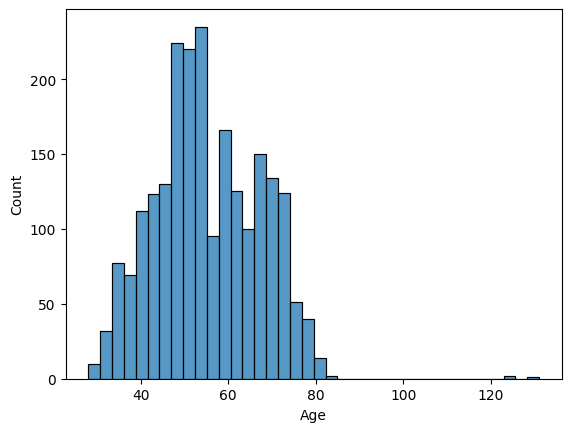

In [18]:
# let's Check out the distribution of Age
sea_born.histplot(data=dat_fram,x=dat_fram['Age'])

<Axes: xlabel='Age', ylabel='Count'>

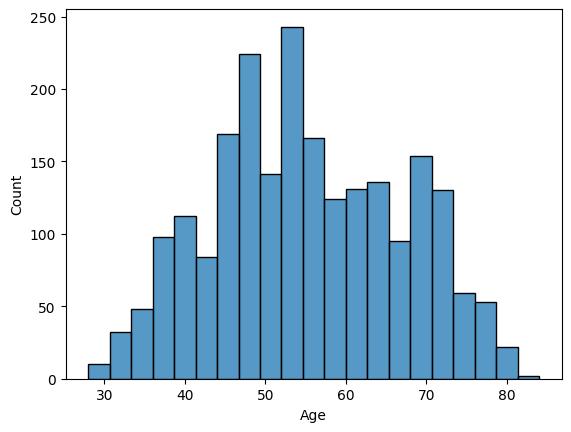

In [19]:
# In Age we can see some outliers in the data which need to be removed 
flt = (dat_fram['Age'] > 100)   
dropped=dat_fram.loc[flt]
dat_fram.drop(index=dropped.index,inplace=True)
sea_born.histplot(data=dat_fram,x=dat_fram['Age'])

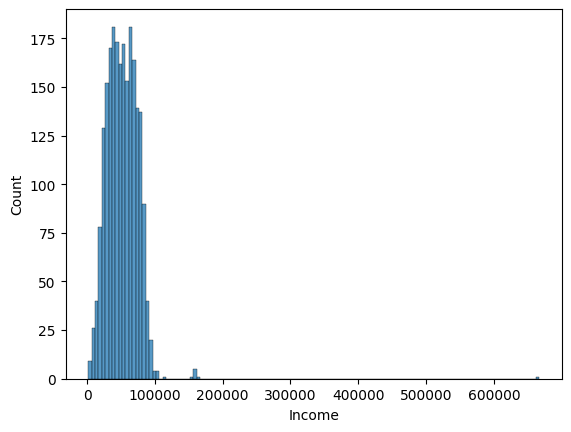

In [20]:
#let's Check out the distribution of income
sea_born.histplot(data=dat_fram , x='Income')
mtpltlib.show()

<Axes: xlabel='Income', ylabel='Count'>

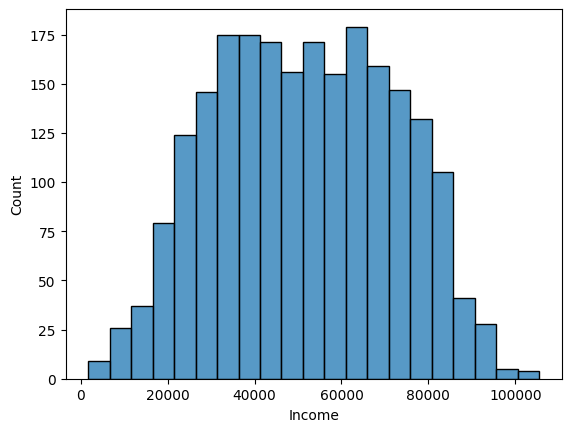

In [21]:
# In Income column we can see some outliers in the data which need to be removed 
flt = (dat_fram['Income'] > 110000)   
dropped=dat_fram.loc[flt]
dat_fram.drop(index=dropped.index,inplace=True)
sea_born.histplot(data=dat_fram,x=dat_fram['Income'])

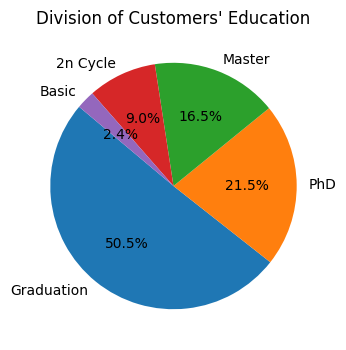

In [22]:
# Count the occurrences of each education level
edu = dat_fram['Education'].value_counts()

# Plot the pie chart
mtpltlib.figure(figsize=(6, 4))
edu.plot(kind='pie', autopct='%1.1f%%', startangle=140)
mtpltlib.title('Division of Customers\' Education')
mtpltlib.ylabel('')  # Remove the ylabel
mtpltlib.show()



# Question
1-What variables exhibit a strong relationship with the number of web purchases?

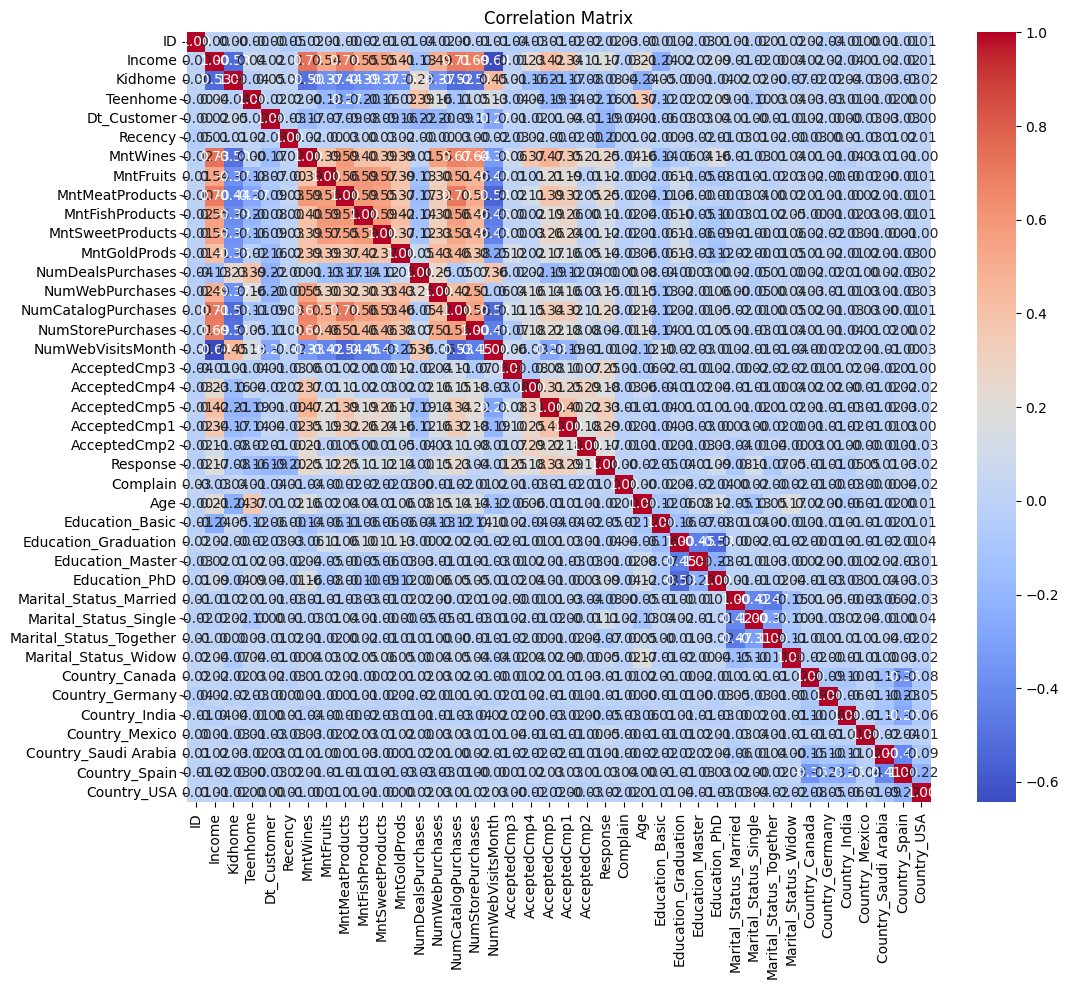

NumWebPurchases            1.000000
MntWines                   0.552947
NumStorePurchases          0.513755
Income                     0.492011
MntGoldProds               0.433183
NumCatalogPurchases        0.423279
MntSweetProducts           0.334021
MntMeatProducts            0.323927
MntFruits                  0.303762
MntFishProducts            0.301553
NumDealsPurchases          0.252394
Teenhome                   0.159742
AcceptedCmp4               0.158753
AcceptedCmp1               0.158566
Response                   0.150416
Age                        0.149024
AcceptedCmp5               0.142106
Education_PhD              0.060499
AcceptedCmp3               0.042733
Marital_Status_Widow       0.037111
AcceptedCmp2               0.034747
Country_USA                0.032545
Country_Canada             0.030851
Country_Mexico             0.025710
Education_Graduation       0.016954
Country_Saudi Arabia       0.012760
Marital_Status_Married     0.004224
Marital_Status_Together    0

In [23]:

dat_fram_copy2 = dat_fram.copy()
# Calculate correlation coefficients
dat_fram_encoded = pnd.get_dummies(dat_fram_copy2, columns=['Education', 'Marital_Status','Country'], drop_first=True)
correlation_matrix = dat_fram_encoded.corr()
web_purchase_correlation = correlation_matrix['NumWebPurchases'].sort_values(ascending=False)

# # Display correlations

# Plot heatmap
mtpltlib.figure(figsize=(12, 10))
sea_born.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
mtpltlib.title('Correlation Matrix')
mtpltlib.show()
print(web_purchase_correlation)

# Findings 

The number of web purchases is significantly positively correlated with wine purchases (0.55) and in-store purchases (0.51), indicating that customers who buy wine and frequent brick-and-mortar stores are likelier to make web purchases. Additionally, income shows a moderate positive correlation (0.49), suggesting that customers with higher incomes tend to make more web purchases.

# Question 

2-Which marketing campaign was the most successful?

In [ ]:

# Calculate response rates for each campaign
response_rates = dat_fram[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean() * 100

# Plot response rates
mtpltlib.figure(figsize=(10, 6))
response_rates.plot(kind='bar', color='blue')
mtpltlib.title('Response Rates for Marketing Campaigns')
mtpltlib.xlabel('Campaign')
mtpltlib.grid(axis='y', linestyle='--', alpha=0.7)
mtpltlib.show()

# Findings 

Based on the analysis of marketing campaign response rates, we observed that the response rates for the last three campaigns were better compared to Campaign 2. However, the response rates for the last three campaigns exhibited a somewhat linear trend with minimal variation.

# Question

3-Which products are performing best?

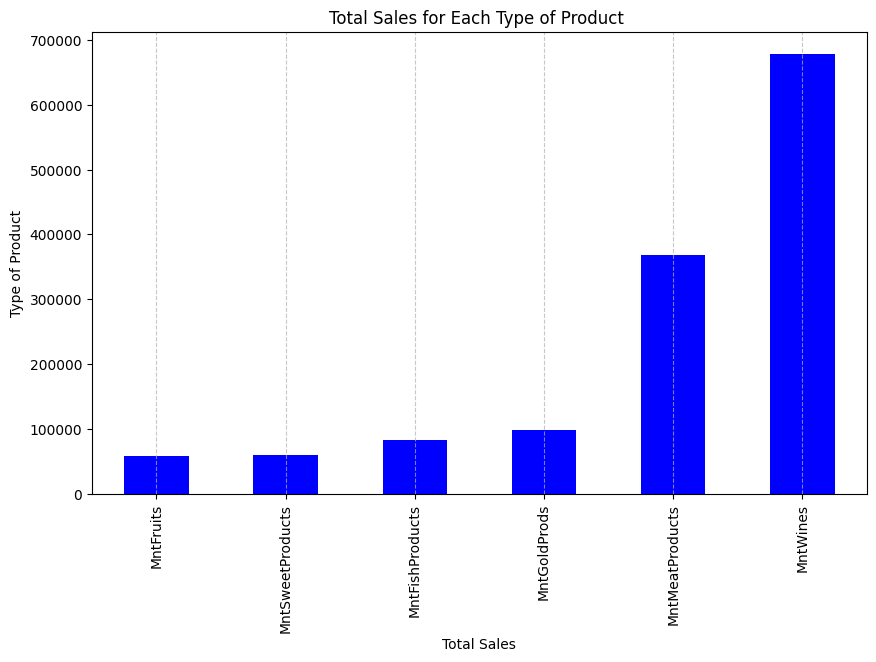

In [25]:

# Calculate total sales amounts for each product category
total_sales = dat_fram[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
total_sales
# Plot total sales for each product category
mtpltlib.figure(figsize=(10, 6))
total_sales.sort_values().plot(kind='bar', color='blue')
mtpltlib.title('Total Sales for Each Type of Product ')
mtpltlib.xlabel('Total Sales')
mtpltlib.ylabel('Type of Product')
mtpltlib.grid(axis='x', linestyle='--', alpha=0.7)
mtpltlib.show()

# Findings 

The products that are performing best based on their total sales volume are wine (MntWines) and meat products (MntMeatProducts). 
Wine sales total $678,465, while meat products sales amount to , $367,690. 
This suggests a strong demand for these products among customers, possibly indicating popular choices or successful marketing campaigns targeting these product categories.
Understanding the factors driving the success of these products can inform future marketing strategies and product offerings to further capitalize on consumer preferences and market trends.

# Question

4-Which channels are underperforming?

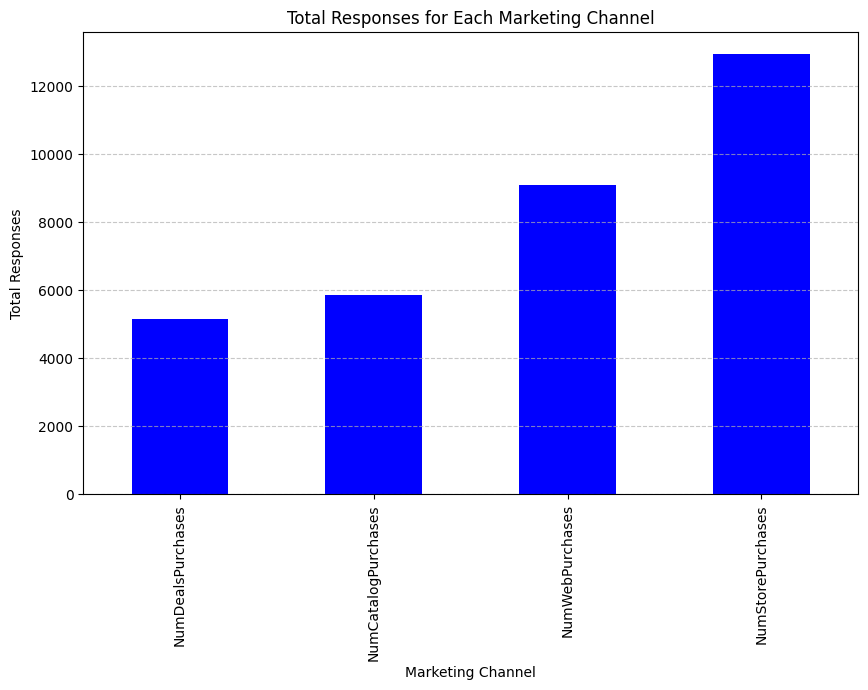

In [26]:
# Calculate total responses for each marketing channel
total_responses = dat_fram[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Plot total responses for each marketing channel
mtpltlib.figure(figsize=(10, 6))
total_responses.sort_values().plot(kind='bar', color='blue')
mtpltlib.title('Total Responses for Each Marketing Channel')
mtpltlib.xlabel('Marketing Channel')
mtpltlib.ylabel('Total Responses')

mtpltlib.grid(axis='y', linestyle='--', alpha=0.7)
mtpltlib.show()


# Findings 

Based on the analysis of purchasing modes among customers, we have found that store purchases are preferable compared to other modes of purchase. 
This suggests that people are more likely to visit physical stores.

# Question

5-  What are the top three countries where the average number of store purchases (NumStorePurchases) is highest?

In [27]:

# Calculate the average of each store purchase country-wise 
mean_store_purchases = dat_fram.groupby('Country')['NumStorePurchases'].mean()

# Sort the countries based on the mean number of store purchases
countries_sorted = mean_store_purchases.sort_values(ascending=False)

# Fetch three top revenue-providing counties
top_three_countries = countries_sorted.head(3)

print("Top 3 Countries with the Highest Mean Number of Store Purchases:")
print(top_three_countries)

Top 3 Countries with the Highest Mean Number of Store Purchases:
Country
Mexico     6.333333
USA        6.083333
Germany    6.008333
Name: NumStorePurchases, dtype: float64


# Findings 

The top three countries with the highest mean number of store purchases are Mexico, the USA, and Germany.
Customers in these countries, on average, make approximately 6 to 6.3 store purchases. 
This indicates a relatively high level of engagement with retail stores among consumers in these regions,
suggesting favorable market conditions for brick-and-mortar retail businesses and potential opportunities for targeted marketing strategies to capitalize on in-store purchases.

# Question

6- How can we segment customers based on their demographic and behavioral characteristics to tailor marketing strategies more effectively?

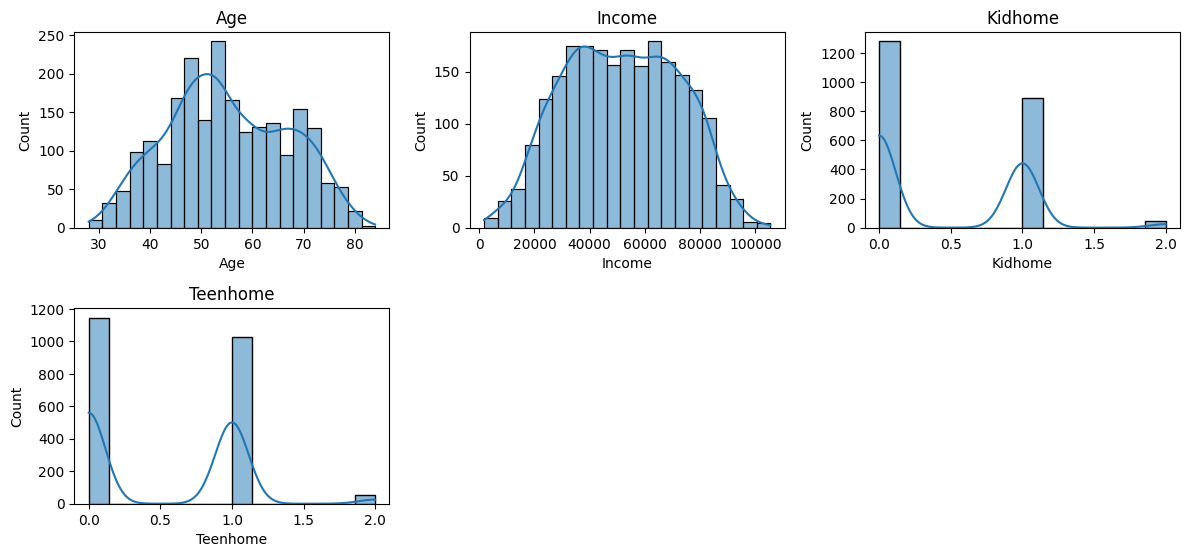

In [28]:

# Select relevant features for segmentation
features_for_segmentation = ['Age', 'Income', 'Kidhome', 'Teenhome']

# Calculate descriptive statistics
segmentation_stats = dat_fram[features_for_segmentation].describe()

# Visualize the distribution of features
mtpltlib.figure(figsize=(12, 8))
for j, seg_fea in enumerate(features_for_segmentation, 1):
    mtpltlib.subplot(3, 3, j)
    sea_born.histplot(dat_fram[seg_fea], kde=True)
    mtpltlib.title(seg_fea)
mtpltlib.tight_layout()
mtpltlib.show()


 

# Findings

The average customer is approximately 55 years old with an income of $51,592.
They typically have one child at home and one teenager at home. 
This profile suggests a middle-aged demographic with moderate household size and 
likely represents a family-oriented consumer segment with varying needs and preferences.

# Question

7- Which products are most frequently purchased together?

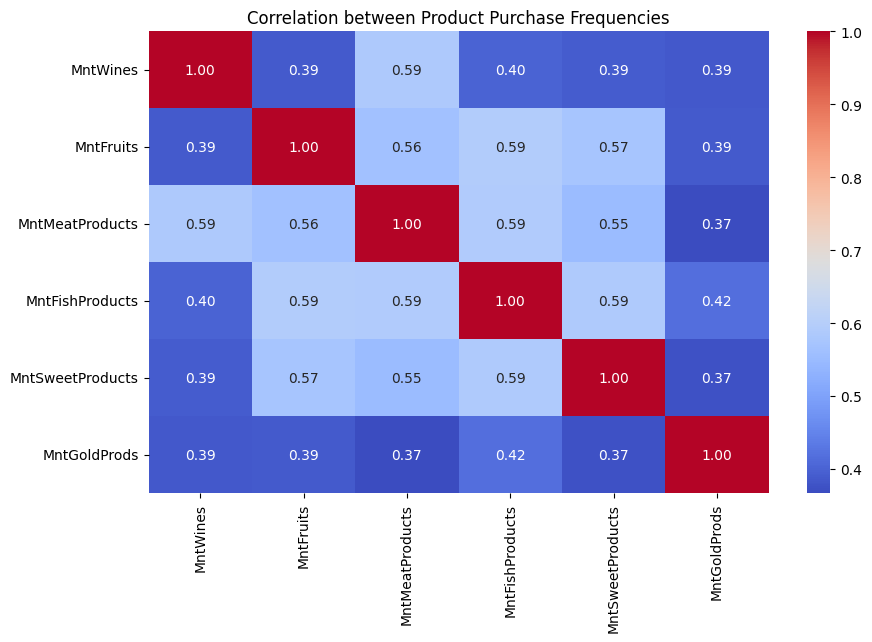

In [29]:

# Select relevant columns for product performance analysis
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds']

# Calculate descriptive statistics
product_stats = dat_fram[product_columns].describe()

# Calculate correlation matrix
product_correlation_matrix = dat_fram[product_columns].corr()

# Visualize the correlation matrix as a heatmap
mtpltlib.figure(figsize=(10, 6))
sea_born.heatmap(product_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
mtpltlib.title('Correlation between Product Purchase Frequencies')
mtpltlib.show()


# Findings

The correlations of 0.59 between wine and meat, fruit and fish, meat and fish, and fish, meat, and sweets indicate moderate positive associations, 
suggesting common purchasing patterns and potential cross-selling opportunities between these product categories.
Leveraging these correlations can inform targeted marketing strategies to promote complementary products and drive sales.

# Conclusion: 

Our analysis underscores the intricate relationship between web purchases and sales of wine/meat, as well as income, indicating diverse consumer behavior patterns. While recent marketing campaigns surpassed Campaign 2, they exhibited minimal variance, suggesting possible market saturation. Leading in total sales, of wine, and meat products highlights the necessity of adapting strategies to
evolving consumer tastes for continued success.
Our analysis reveals a significant preference for store purchases, with Mexico, the USA, and Germany emerging as the top three countries with the highest number of store purchases. This underscores the importance of understanding consumer behavior across different regions to tailor marketing strategies effectively and capitalize on in-store sales opportunities.